## Huấn luyện mô hình CNN cho tập MNIST FASHION

### Fashion-MNIST

* Bộ dữ liệu Fashion-MNIST được tạo ra bởi Zalando, một công ty thương mại điện tử của Đức. Bộ dữ liệu này được phát hành dưới dạng mã nguồn mở và có thể được tải xuống miễn phí. 
* Bao gồm 70.000 hình ảnh (trong đó gồm 60000 tập training, 10000 tập test)
* Bộ dữ liệu Fashion-MNIST là một bộ dữ liệu hình ảnh được sử dụng để đào tạo và đánh giá các mô hình học máy. Bộ dữ liệu này bao gồm 70.000 hình ảnh kích thước 28x28 pixel của 10 loại quần áo khác nhau, bao gồm: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Topics
1. [**Quan sát bộ dữ liệu**](#there_you_go_1)
> *  [1.1 Import các thư viện cần thiết ](#there_you_go_1.1)
>  * [1.2 Load bộ dữ liệu ](#there_you_go_1.2)
>  * [1.3 Label ](#there_you_go_1.3)
>  * [1.4 Kiểu và chiều của dữ liệu ](#there_you_go_1.4)
2. [**Xem dữ liệu trên pyplot**](#there_you_go_2)
> * [2.1 Hiển thị hình ảnh trong dataset bằng pyplot ](#there_you_go_2.1)
> * [2.2 Mức độ phân tán của các label ](#there_you_go_2.2)
3. [**Data PreProcessing**](#there_you_go_3)
> * [3.2 Splitting Data ](#there_you_go_3.1)
> * [3.3 Reshaping Images ](#there_you_go_3.2)
> * [3.4 Normalization ](#there_you_go_3.3)
4. [**Training Model**](#there_you_go_4)
> * [4.1 Build Model ](#there_you_go_4.1)
> * [4.2 Compiling Model ](#there_you_go_4.2)
> * [4.3 Model Summary ](#there_you_go_4.3)
> * [4.4 Learning Rate Decay ](#there_you_go_4.4)
> * [4.5 Data Augmentation ](#there_you_go_4.5)
> * [4.6 Early Callbacks ](#there_you_go_4.6)
> * [4.7 Fitting the Model](#there_you_go_4.7)
5. [**Đánh giá Model**](#there_you_go_5)
> * [5.1 Plotting Train and Validation curves ](#there_you_go_5.1)
> * [5.2Plotting Confusion Matrix**](#there_you_go_6)
> * [5.3 Visualization of Predicted Classes**](#there_you_go_7)
> * [5.4 Correctly Predicted Classes](#there_you_go_7.1)
> * [5.5 Incorrectly Predicted Classes](#there_you_go_7.2)
> * [5.6 Predicting on Test Data**](#there_you_go_9)
6. [**Bonus**](#there_you_go_6)

<a id="there_you_go_1"></a>
## 1) Quan sát bộ dữ liệu

<a id="there_you_go_1.1"></a>
### 1.1) Importing các thư viện cần thiết

In [1]:
%pip install scikeras
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [117]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import savefig
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Conv1D, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras_tuner.tuners import RandomSearch
from collections import Counter
import pandas as pd
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import MaxPooling2D, AveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

### 1.2) Load bộ dữ liệu

In [3]:
fashion_set = fashion_mnist.load_data()
(X, y), (X_test, y_test) = fashion_set

4422102/4422102 [==============================] - 0s 0us/step


### 1.3) Label

- Nhãn được đánh số từ 0 đến 9 lần lượt là: 
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


![Imgur](https://i.imgur.com/coDqChv.png)

### 1.4) Kiểu dữ liệu và chiều dữ liệu

In [110]:
print(f'type of an example {type(X[0])}')
print(f'type of an example {X[0].shape}')

print(f'Dimension of training set {X.shape}')
print(f'Dimension of test set {X_test.shape}')

type of an example <class 'numpy.ndarray'>
type of an example (28, 28)
Dimension of training set (60000, 28, 28)
Dimension of test set (10000, 28, 28)


<a id='there_you_go_2'></a>
## 2. Xem dữ liệu trên pyplot

### 2.1 Hiển thị một vài ảnh mẫu bằng pyplot

In [152]:
def plot_image(X, y, images_per_row=10, name=''):
    class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    size = 28 #default size X_train.shape
    number_img = X.shape[0]
    X = X.reshape(number_img, size, size)
    no_rows = int(np.ceil(number_img/images_per_row))
    n_empty_image = no_rows * images_per_row - number_img
    
    y_text_array = [class_names[y_value] for y_value in y]
    
    #combine input with empty set
    image_set = np.concatenate([X, np.zeros((n_empty_image, size, size))], axis=0)
    label_set = np.concatenate([y_text_array, -np.ones(n_empty_image)], axis=0)
    #image_grid = image_set.reshape(no_rows, images_per_row, size, size)
    #images = image_grid.transpose(0,2,1,3).reshape(no_rows * size, images_per_row * size)
    print(image_set.shape)
    #plt.imshow(X=images, , cmap=mpl.cm.binary)
    fig, axes = plt.subplots(nrows=no_rows, ncols=images_per_row, figsize=(images_per_row * 1.5,no_rows))
    fig.tight_layout(pad=0.13, rect=[0, 0.12, 1, 2]) #[left,bottom, right, top]

    for (i,ax), y_set in zip(enumerate(axes.flat), label_set):
        ax.imshow(image_set[i], cmap='binary')
        ax.set_title(f'{y_set}')
        ax.set_xticks([])
        ax.set_yticks([])
    fig.suptitle(name, x=0.5, y=2.25)


(20, 28, 28)


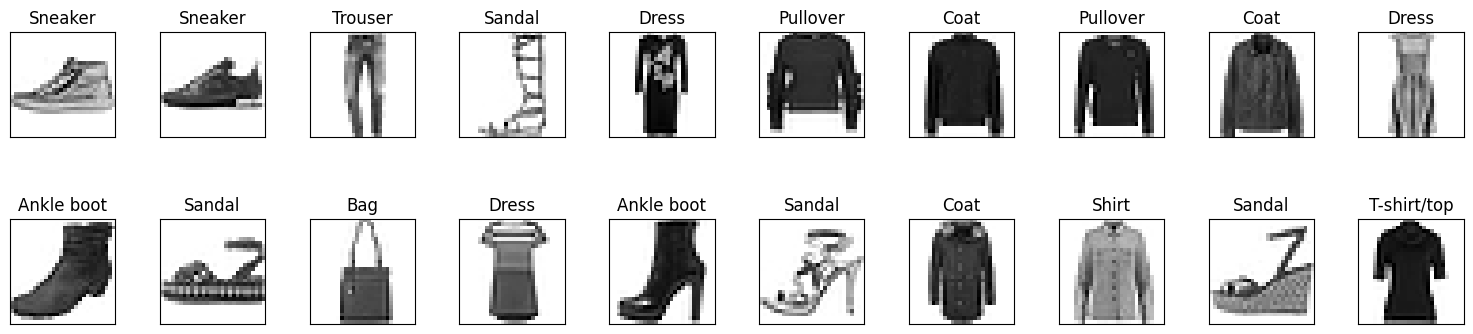

In [153]:
plot_image(X_train[:20], y_train[:20], images_per_row=10)

### 2.2 Mức độ phân tán các label

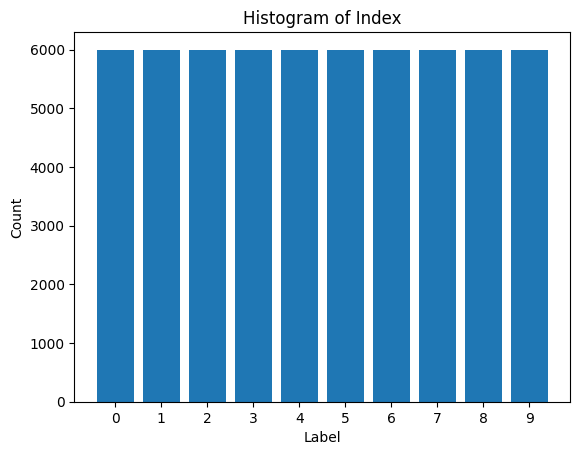

In [114]:
y_counter = Counter(y)
df = pd.DataFrame.from_dict(y_counter, orient='index', columns=['Count']).sort_index(ascending=True)
indexs = df.index
count_n = df['Count']
plt.bar(indexs, count_n, align='center')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Index')
plt.xticks(indexs)
savefig('distribution of label.png')
plt.show()


Có thể thấy trên tập train các nhãn dữ liệu được phân tán ra rất đồng đều, điều này sẽ rất tốt cho model khi chúng phải học đều tất cả các nhãn

<a id='there_you_go_3'></a>
## 3. Preprocessing

### 3.1 Split data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_cross, y_train, y_cross = train_test_split(X, y, test_size=0.2, stratify=y)

### 3.2 Reshape image

Input đầu vào của model CNN thường là 3 chiều gồm (width, height, channel) nhưng hình ảnh chỉ là ma trận 28x28 (widthxheight). Nên ta cần reshape hình ảnh lại từ (28,28) thành (28,28,1)

### 3.3 Normalize input

Giá trị của các example nằm từ khoảng 0-255 chúng ta có thể normalize các giá trị này để chúng nằm trong khoảng từ 0-1. Điều này có lợi trong việc cải thiện model và cho phép chúng học nhanh hơn.

### Apply reshape và normalize

In [5]:
IMG_SIZE = 28
resize_and_rescale = Sequential([
    Resizing(IMG_SIZE, IMG_SIZE, input_shape=[IMG_SIZE, IMG_SIZE, 1]),
    Rescaling(1./255)
    ])


In [6]:
X_train_process=resize_and_rescale(X_train)
X_cross_process=resize_and_rescale(X_cross)
X_test_process=resize_and_rescale(X_test)

<a id='there_you_go_4'></a>
## 4. Build model

### 4.1 Xây dựng hàm build model

model CNN:
* 1. Layer đầu tiên nhận input đầu vào với shape là (28,28,1), dùng hàm kích hoạt relu
* 2. Tiếp tục sử dụng MaxPooling để với size mặc định (2,2)
* 3. Layer kế tiếp sử dụng Conv2D tương tự như trên nhưng với số units cao.
* 3. Sau đó sử dụng MaxPooling để với size mặc định (2,2)
* Ngoài ra dùng thêm một vài hyperparameters như padding, BatchNormalization, Dropout:
    * Padding='same' sẽ thêm các pixel 0 xung quanh đầu vào để kích thước đầu ra bằng với kích thước đầu vào. Điều này đảm bảo rằng tất cả các phần của đầu vào đều được xử lý bởi phép biến đổi.
    * BatchNormalization: chuẩn hóa hàm z trong các lớp ẩn điều này cải thiện giúp model trở nên ổn định và hiệu quả hơn, ngoài ra còn giảm thiểu internal covariate shift: Internal covariate shift là hiện tượng phân phối của các đầu vào của một lớp ẩn thay đổi theo thời gian trong quá trình học tập.
    * Dropout: ngẫu nhiên bỏ qua một số đơn vị (units) trong một mạng nơ-ron trong quá trình huấn luyện. Điều này giúp model hạn chế overfitting
* 4. Flatten() để map input trước nó thành 1D matrix (vector)
* 5. Tạo dense layer
* 6. Cuối cùng tạo lớp output layer với số units tương đương với số label của tập dữ liệu với hàm kích hoạt là linear
* 7. Compile model sử dụng Adam optimizer.

In [8]:
def build_model():
    model = Sequential()
    model.add(Conv2D(224, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(448, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='linear'))
    
    initial_learning_rate = 1e-3

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'], 
                  loss=SparseCategoricalCrossentropy(from_logits=True))
    return model

### 4.2 Model Summary

In [9]:
model_cnn = build_model()

In [10]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 224)       5824      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 224)      896       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 224)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 224)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 448)       903616    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 448)     

### 4.3 Callbacks

#### 4.3.1 Early Stopping

In [7]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience=10, restore_best_weights=True)
path_cnn='cnn_models/'

checkpoint_cnn = tf.keras.callbacks.ModelCheckpoint(
    filepath = path_cnn + 'model_cnn_{epoch:}_val_acc_{val_accuracy:.2f}.h5',
    verbose=1,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

#### 4.3.2 Model Checkpoint

### 4.4 Fit model

In [11]:
history=model_cnn.fit(X_train_process, y_train, batch_size=128, 
                      verbose=1, epochs=100, validation_data=(X_cross_process, y_cross),
                     callbacks=[early_stop,checkpoint_cnn])

Epoch 1/100


2023-09-15 01:19:19.759277: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.7879
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to cnn_models/model_cnn_1_val_acc_0.10.h5
375/375 [==============================] - 36s 59ms/step - loss: 0.6077 - accuracy: 0.7879 - val_loss: 35.6974 - val_accuracy: 0.1000
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 0.3722 - accuracy: 0.8644
Epoch 2: val_accuracy improved from 0.10000 to 0.87175, saving model to cnn_models/model_cnn_2_val_acc_0.87.h5
375/375 [==============================] - 22s 58ms/step - loss: 0.3722 - accuracy: 0.8644 - val_loss: 0.3441 - val_accuracy: 0.8717
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 0.3228 - accuracy: 0.8816
Epoch 3: val_accuracy improved from 0.87175 to 0.90317, saving model to cnn_models/model_cnn_3_val_acc_0.90.h5
375/375 [==============================] - 22s 59ms/step - loss: 0.3228 - accuracy: 0.8816 - val_loss: 0.2685 - val_accuracy

<a id='there_you_go_5'></a>
### 5.) Đánh giá model

### 5.1) Accuracy giữa training và cross set

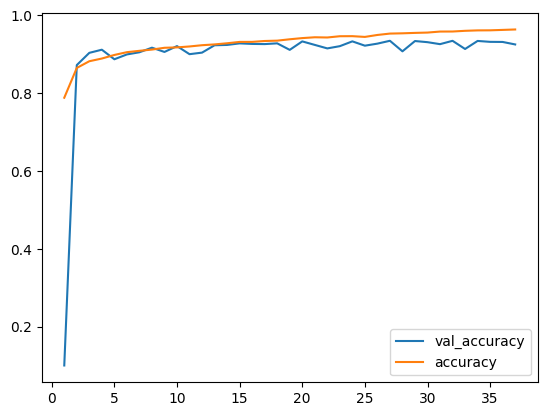

In [12]:
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
# You can specify a label for each model if you want to include a legend
plt.plot(range(1, len(val_acc) + 1), val_acc, label='val_accuracy')
plt.plot(range(1, len(val_acc) + 1), acc, label='accuracy')
plt.legend()
savefig('val_acc_vs_acc_of_model_cnn.png')

### 5.2) Loss giữa training và cross set

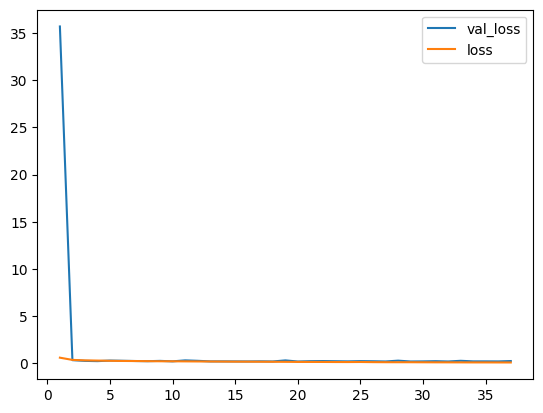

In [13]:
val_acc = history.history['val_loss']
acc = history.history['loss']
# You can specify a label for each model if you want to include a legend
plt.plot(range(1, len(val_acc) + 1), val_acc, label='val_loss')
plt.plot(range(1, len(val_acc) + 1), acc, label='loss')
plt.legend()
savefig('val_loss_vs_loss_of_model_cnn.png')

### 5.4) Confusion Matrix

313/313 [==============================] - 1s 4ms/step
(10000,)


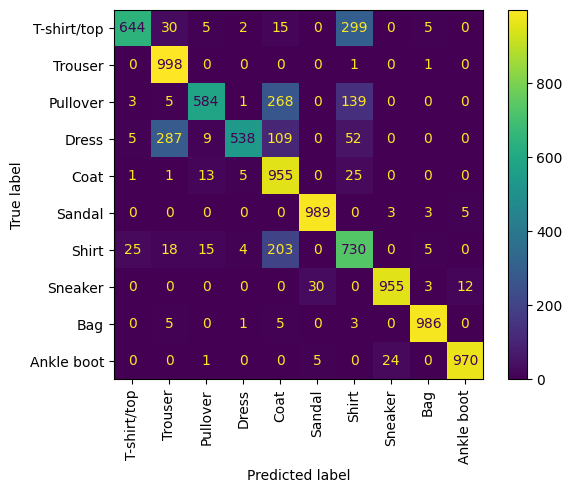

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_truth = y_test
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)
print(y_pred.shape)
cf_matrix = confusion_matrix(y_truth, y_pred)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=class_names)

fig, ax = plt.subplots()

disp.plot(ax=ax)

# Get the x-axis labels
x_labels = ax.get_xticklabels()

# Rotate the x-axis labels by 45 degrees
for label in x_labels:
    label.set_rotation(90)

savefig('Confusion matrix.png')

### 5.5) Visualize một vài hình ảnh predict đúng

(12, 28, 28)


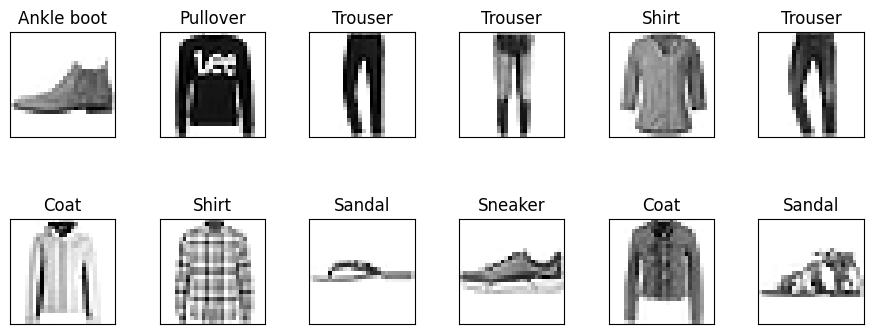

In [156]:
correct = []
for i in range(len(y_pred)):
    if(y_pred[i] == y_truth[i]):
        correct.append(i)
    if len(correct) == 12:
        break
        
plot_image(X_test[correct], y_pred[correct], images_per_row=6)
savefig('true_prediction_cnn')

### 5.5) Visualize một vài hình ảnh predict sai

12
(12, 28, 28)


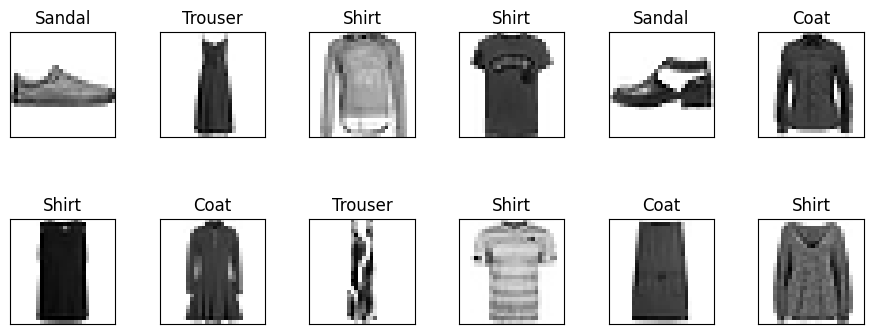

In [157]:
incorrect = []
for i in range(len(y_pred)):
    if(y_pred[i] != y_truth[i]):
        incorrect.append(i)
    if len(incorrect) == 12:
        break
print(len(incorrect))
plot_image(X_test[incorrect], y_pred[incorrect], images_per_row=6)
savefig('false_prediction_cnn.png')

### 5.6) Độ chính xác trên tập test

In [14]:
score = model_cnn.evaluate(X_test_process, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.2222 - accuracy: 0.9288
Loss: 0.2222
Accuracy: 0.9288


<a id='there_you_go_6'></a>
### 6. Bonus: dùng model augment và learning rate decay để thử cải tiến model

### 6.1) Build model

In [103]:
def build_model_compl():
    model = Sequential()
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.5))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='linear'))
    
    initial_learning_rate = 1e-2

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))
    return model

In [104]:
model_augm=build_model_compl()
model_augm.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 batch_normalization_112 (Ba  (None, 28, 28, 256)      1024      
 tchNormalization)                                               
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 dropout_106 (Dropout)       (None, 14, 14, 256)       0         
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 512)       1180160   
                                                                 
 batch_normalization_113 (Ba  (None, 14, 14, 512)    

### 6.2) Data Augment

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

Data augmentation là một kỹ thuật được sử dụng để tăng số lượng dữ liệu đào tạo cho mô hình học máy. Kỹ thuật này tạo ra các biến thể của dữ liệu đầu vào ban đầu bằng cách áp dụng các phép biến đổi khác nhau, chẳng hạn như xoay, lật, thay đổi độ sáng, độ tương phản, v.v.

Ở đây sẽ dùng 3 kiểu đó là
* tự động xoay
* tự động zoom
* giãn ảnh
* dịch trái/phải
* lật ngược theo chiều ngang

In [ ]:
X_augm_example, y_example = data_generator.flow(X_train_process, y_train, batch_size=10, shuffle=False).next()
plot_image(X_augm_example[:10], y_example[:10], 5, 'Augment Image')
plot_image(X_train_process[:10], y_train[:10], 5, 'Original Image')

### 6.3) Learning rate decay

Learning rate decay là một kỹ thuật được sử dụng để giảm tốc độ học tập của mô hình học máy theo thời gian. Kỹ thuật này được sử dụng để tránh việc mô hình bị quá khớp với dữ liệu đào tạo.

Tốc độ học tập là một tham số quan trọng trong học máy, xác định mức độ thay đổi của trọng số mô hình trong mỗi lần cập nhật. Khi tốc độ học tập quá cao, mô hình có thể bị quá khớp với dữ liệu đào tạo, dẫn đến việc mô hình hoạt động kém trên dữ liệu kiểm tra.

In [68]:
path_augm='agm_models/'
checkpoint_augm = tf.keras.callbacks.ModelCheckpoint(
    filepath = path_augm + 'model_aug_{epoch:}_val_acc_{val_accuracy:.2f}.h5',
    verbose=1,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [70]:
datagen.fit(X_train_process)

In [105]:
from tensorflow.keras.callbacks import LearningRateScheduler
epochs=100
lr_decay=LearningRateScheduler(lambda x: 1e-3 * 0.96 ** (x+epochs))


history_w_augm=model_augm.fit(datagen.flow(X_train_process, y_train, batch_size=128), epochs=epochs, 
                          steps_per_epoch=X_train_process.shape[0]//128,validation_data = (X_cross_process, y_cross), verbose=1,
                         callbacks=[lr_decay,early_stop,checkpoint_augm])

Epoch 1/100


2023-09-15 02:46:15.496370: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_32/dropout_106/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - ETA: 0s - loss: 1.5435 - accuracy: 0.5231
Epoch 1: val_accuracy did not improve from 0.18783
375/375 [==============================] - 30s 72ms/step - loss: 1.5435 - accuracy: 0.5231 - val_loss: 3.0148 - val_accuracy: 0.1072 - lr: 1.6870e-05
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 1.1142 - accuracy: 0.6309
Epoch 2: val_accuracy improved from 0.18783 to 0.69433, saving model to agm_models/model_aug_2_val_acc_0.69.h5
375/375 [==============================] - 26s 69ms/step - loss: 1.1142 - accuracy: 0.6309 - val_loss: 0.8286 - val_accuracy: 0.6943 - lr: 1.6196e-05
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 0.9666 - accuracy: 0.6709
Epoch 3: val_accuracy improved from 0.69433 to 0.74492, saving model to agm_models/model_aug_3_val_acc_0.74.h5
375/375 [==============================] - 27s 72ms/step - loss: 0.9666 - accuracy: 0.6709 - val_loss: 0.6542 - val_accuracy: 0.7449 - lr: 1.5548e-0

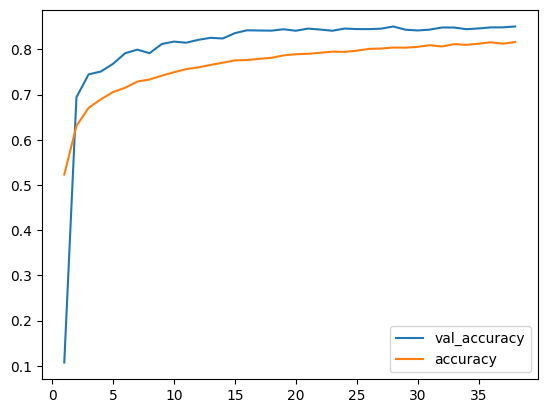

In [106]:
val_acc = history_w_augm.history['val_accuracy']
acc = history_w_augm.history['accuracy']
# You can specify a label for each model if you want to include a legend
plt.plot(range(1, len(val_acc) + 1), val_acc, label='val_accuracy')
plt.plot(range(1, len(acc) + 1), acc, label='accuracy')
plt.legend()
savefig('val_acc_vs_acc_of_model_augm.png')

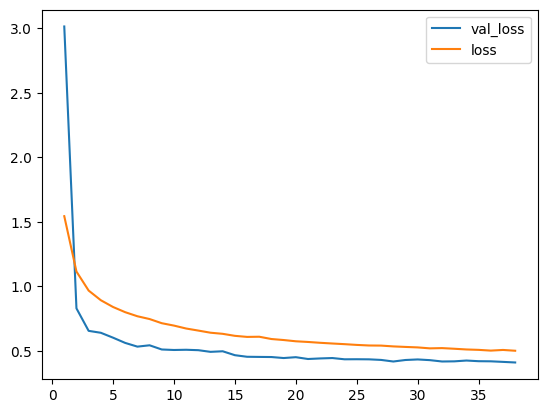

In [107]:
val_loss = history_w_augm.history['val_loss']
loss = history_w_augm.history['loss']
# You can specify a label for each model if you want to include a legend
plt.plot(range(1, len(val_loss) + 1), val_loss, label='val_loss')
plt.plot(range(1, len(loss) + 1), loss, label='loss')
plt.legend()
savefig('val_loss_vs_loss_of_model_augm.png')

In [109]:
score = model_augm.evaluate(X_test_process, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.4351 - accuracy: 0.8475
Loss: 0.4351
Accuracy: 0.8475


In [118]:

!zip -r file.zip /kaggle/working/cnn_models


  adding: kaggle/working/cnn_models/ (stored 0%)
  adding: kaggle/working/cnn_models/model_cnn_20_val_acc_0.93.h5 (deflated 7%)
  adding: kaggle/working/cnn_models/model_cnn_18_val_acc_0.93.h5 (deflated 7%)
  adding: kaggle/working/cnn_models/model_cnn_24_val_acc_0.93.h5 (deflated 7%)
  adding: kaggle/working/cnn_models/model_cnn_2_val_acc_0.87.h5 (deflated 7%)
  adding: kaggle/working/cnn_models/model_cnn_14_val_acc_0.92.h5 (deflated 8%)
  adding: kaggle/working/cnn_models/model_cnn_15_val_acc_0.93.h5 (deflated 8%)
  adding: kaggle/working/cnn_models/model_cnn_10_val_acc_0.92.h5 (deflated 8%)
  adding: kaggle/working/cnn_models/model_cnn_4_val_acc_0.91.h5 (deflated 9%)
  adding: kaggle/working/cnn_models/model_cnn_27_val_acc_0.93.h5 (deflated 7%)
  adding: kaggle/working/cnn_models/model_cnn_1_val_acc_0.10.h5 (deflated 8%)
  adding: kaggle/working/cnn_models/model_cnn_8_val_acc_0.92.h5 (deflated 9%)
  adding: kaggle/working/cnn_models/model_cnn_3_val_acc_0.90.h5 (deflated 9%)
  adding